In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML MID LAB/drug_dateset.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
le = LabelEncoder()

df['Sex_n'] = le.fit_transform(df['Sex'])
df['BP_n'] = le.fit_transform(df['BP'])
df['Cholesterol_n'] = le.fit_transform(df['Cholesterol'])
df['Drug_n'] = le.fit_transform(df['Drug'])

df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_n,BP_n,Cholesterol_n,Drug_n
0,23,F,HIGH,HIGH,25.355,DrugY,0,0,0,0
1,47,M,LOW,HIGH,13.093,drugC,1,1,0,3
2,47,M,LOW,HIGH,10.114,drugC,1,1,0,3
3,28,F,NORMAL,HIGH,7.798,drugX,0,2,0,4
4,61,F,LOW,HIGH,18.043,DrugY,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,0,1,0,3
196,16,M,LOW,HIGH,12.006,drugC,1,1,0,3
197,52,M,NORMAL,HIGH,9.894,drugX,1,2,0,4
198,23,M,NORMAL,NORMAL,14.020,drugX,1,2,1,4


In [ ]:
df=df.drop(['Sex', 'BP', 'Cholesterol', 'Drug'],axis='columns')
df

,Age,Na_to_K,Sex_n,BP_n,Cholesterol_n,Drug_n
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,3
2,47,10.114,1,1,0,3
3,28,7.798,0,2,0,4
4,61,18.043,0,1,0,0
...,...,...,...,...,...,...
195,56,11.567,0,1,0,3
196,16,12.006,1,1,0,3
197,52,9.894,1,2,0,4
198,23,14.020,1,2,1,4


In [ ]:
independent_variable=df.drop('Drug_n',axis='columns')
dependent_var=df['Drug_n']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(independent_variable, dependent_var, test_size=0.2, random_state=42)

In [ ]:
# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Print the accuracy score
print('Accuracy Score:', accuracy)

Accuracy Score: 1.0


In [ ]:
# Training score
training_score = model.score(X_train, y_train)
print('Training Score:', training_score)

Training Score: 1.0


In [ ]:
# Testing score
testing_score = model.score(X_test, y_test)
print('Testing Score:', testing_score)

Testing Score: 1.0


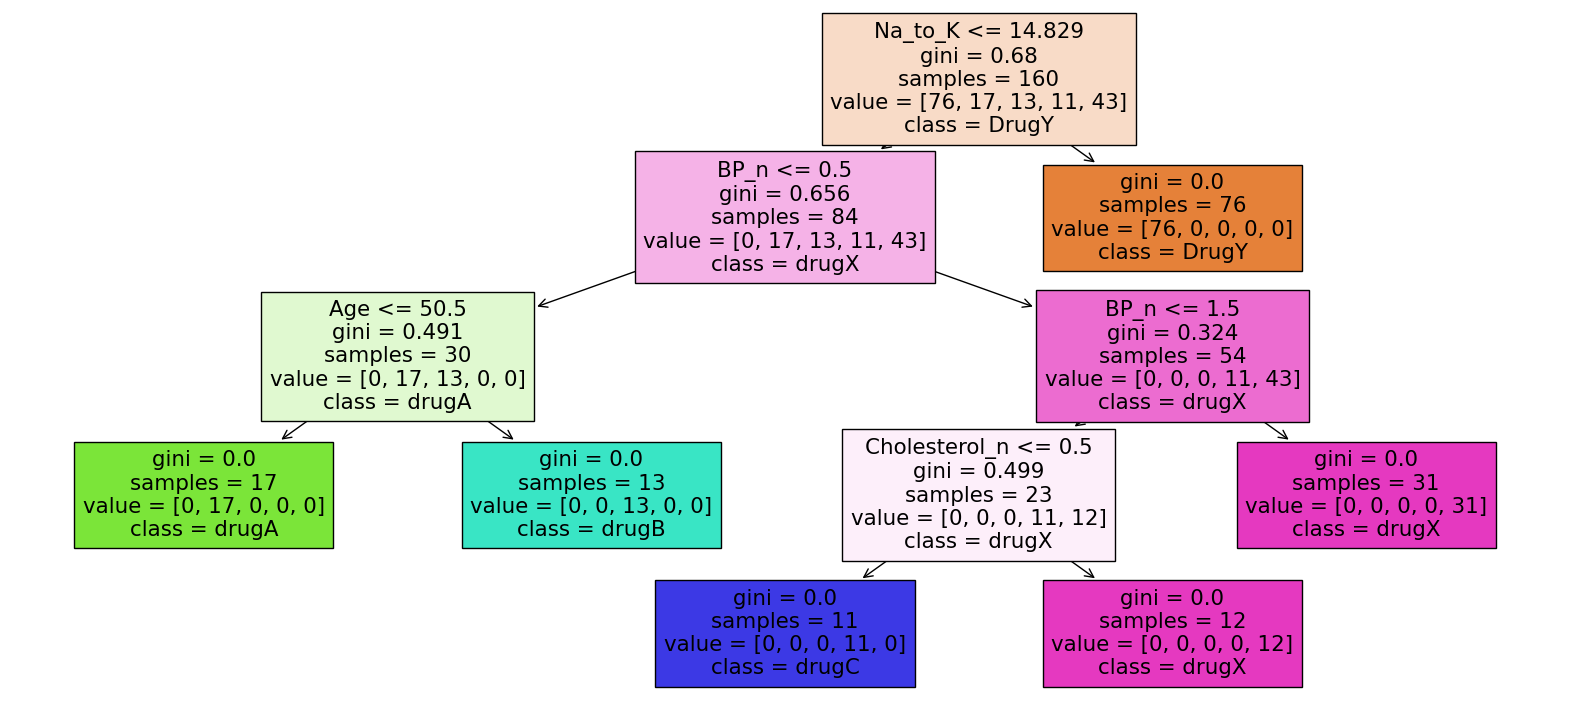

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20, 9))
plot_tree(model, filled=True, feature_names=df.columns, class_names=le.classes_)
plt.show()